In [ ]:
import random

def generate_random_window(size: int, max_value: int) -> tuple[int, int]:
    """
    Generate a random window (start, end) of given size within the range [0, max_value).

    Args:
        size (int): Size of the window.
        max_value (int): Maximum value (exclusive) for indices.

    Returns:
        tuple[int, int]: (start, end) indices of the window.
    """
    assert size > 0, f'size ({size}) must be positive'
    assert size <= max_value, f'size ({size}) must be <= max_value ({max_value})'
    start: int = random.randint(0, max_value - size)
    end: int = start + size
    return start, end

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sarpyx.utils.zarr_utils import ProductHandler, ZarrManager
import os

data_dir = "/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data"
zarr_files = [f for f in os.listdir(data_dir) if f.endswith('.zarr')]
print(f"Found {len(zarr_files)} zarr files:")

    
for idx, zarr_file in enumerate(zarr_files):
    
    if idx in []:
        continue
    else:
        print(f"Processing file {idx+1}/{len(zarr_files)}: {zarr_file}")
        filepath = os.path.join('/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data', zarr_file)
        pHandler = ProductHandler(filepath)
        shapes = pHandler.array_shapes
        H, W  = pHandler.array_shapes['raw']
        print(f"Shapes of arrays in {zarr_file}: {H}x{W}")

        row_start, row_end = 4000, 12000
        col_start, col_end = 4000, 12000

        print(f"DISPLAYED: {zarr_file} with rows: {row_start}-{row_end} and cols: {col_start}-{col_end}")

        pHandler.visualize_arrays(
            array_names=['raw','rc','az'], 
            rows=(row_start, row_end), 
            cols=(col_start, col_end),
            plot_type='magnitude',
            vminmax='auto',
        )
        
        

# Inspection

Shapes of arrays: 7500x25444


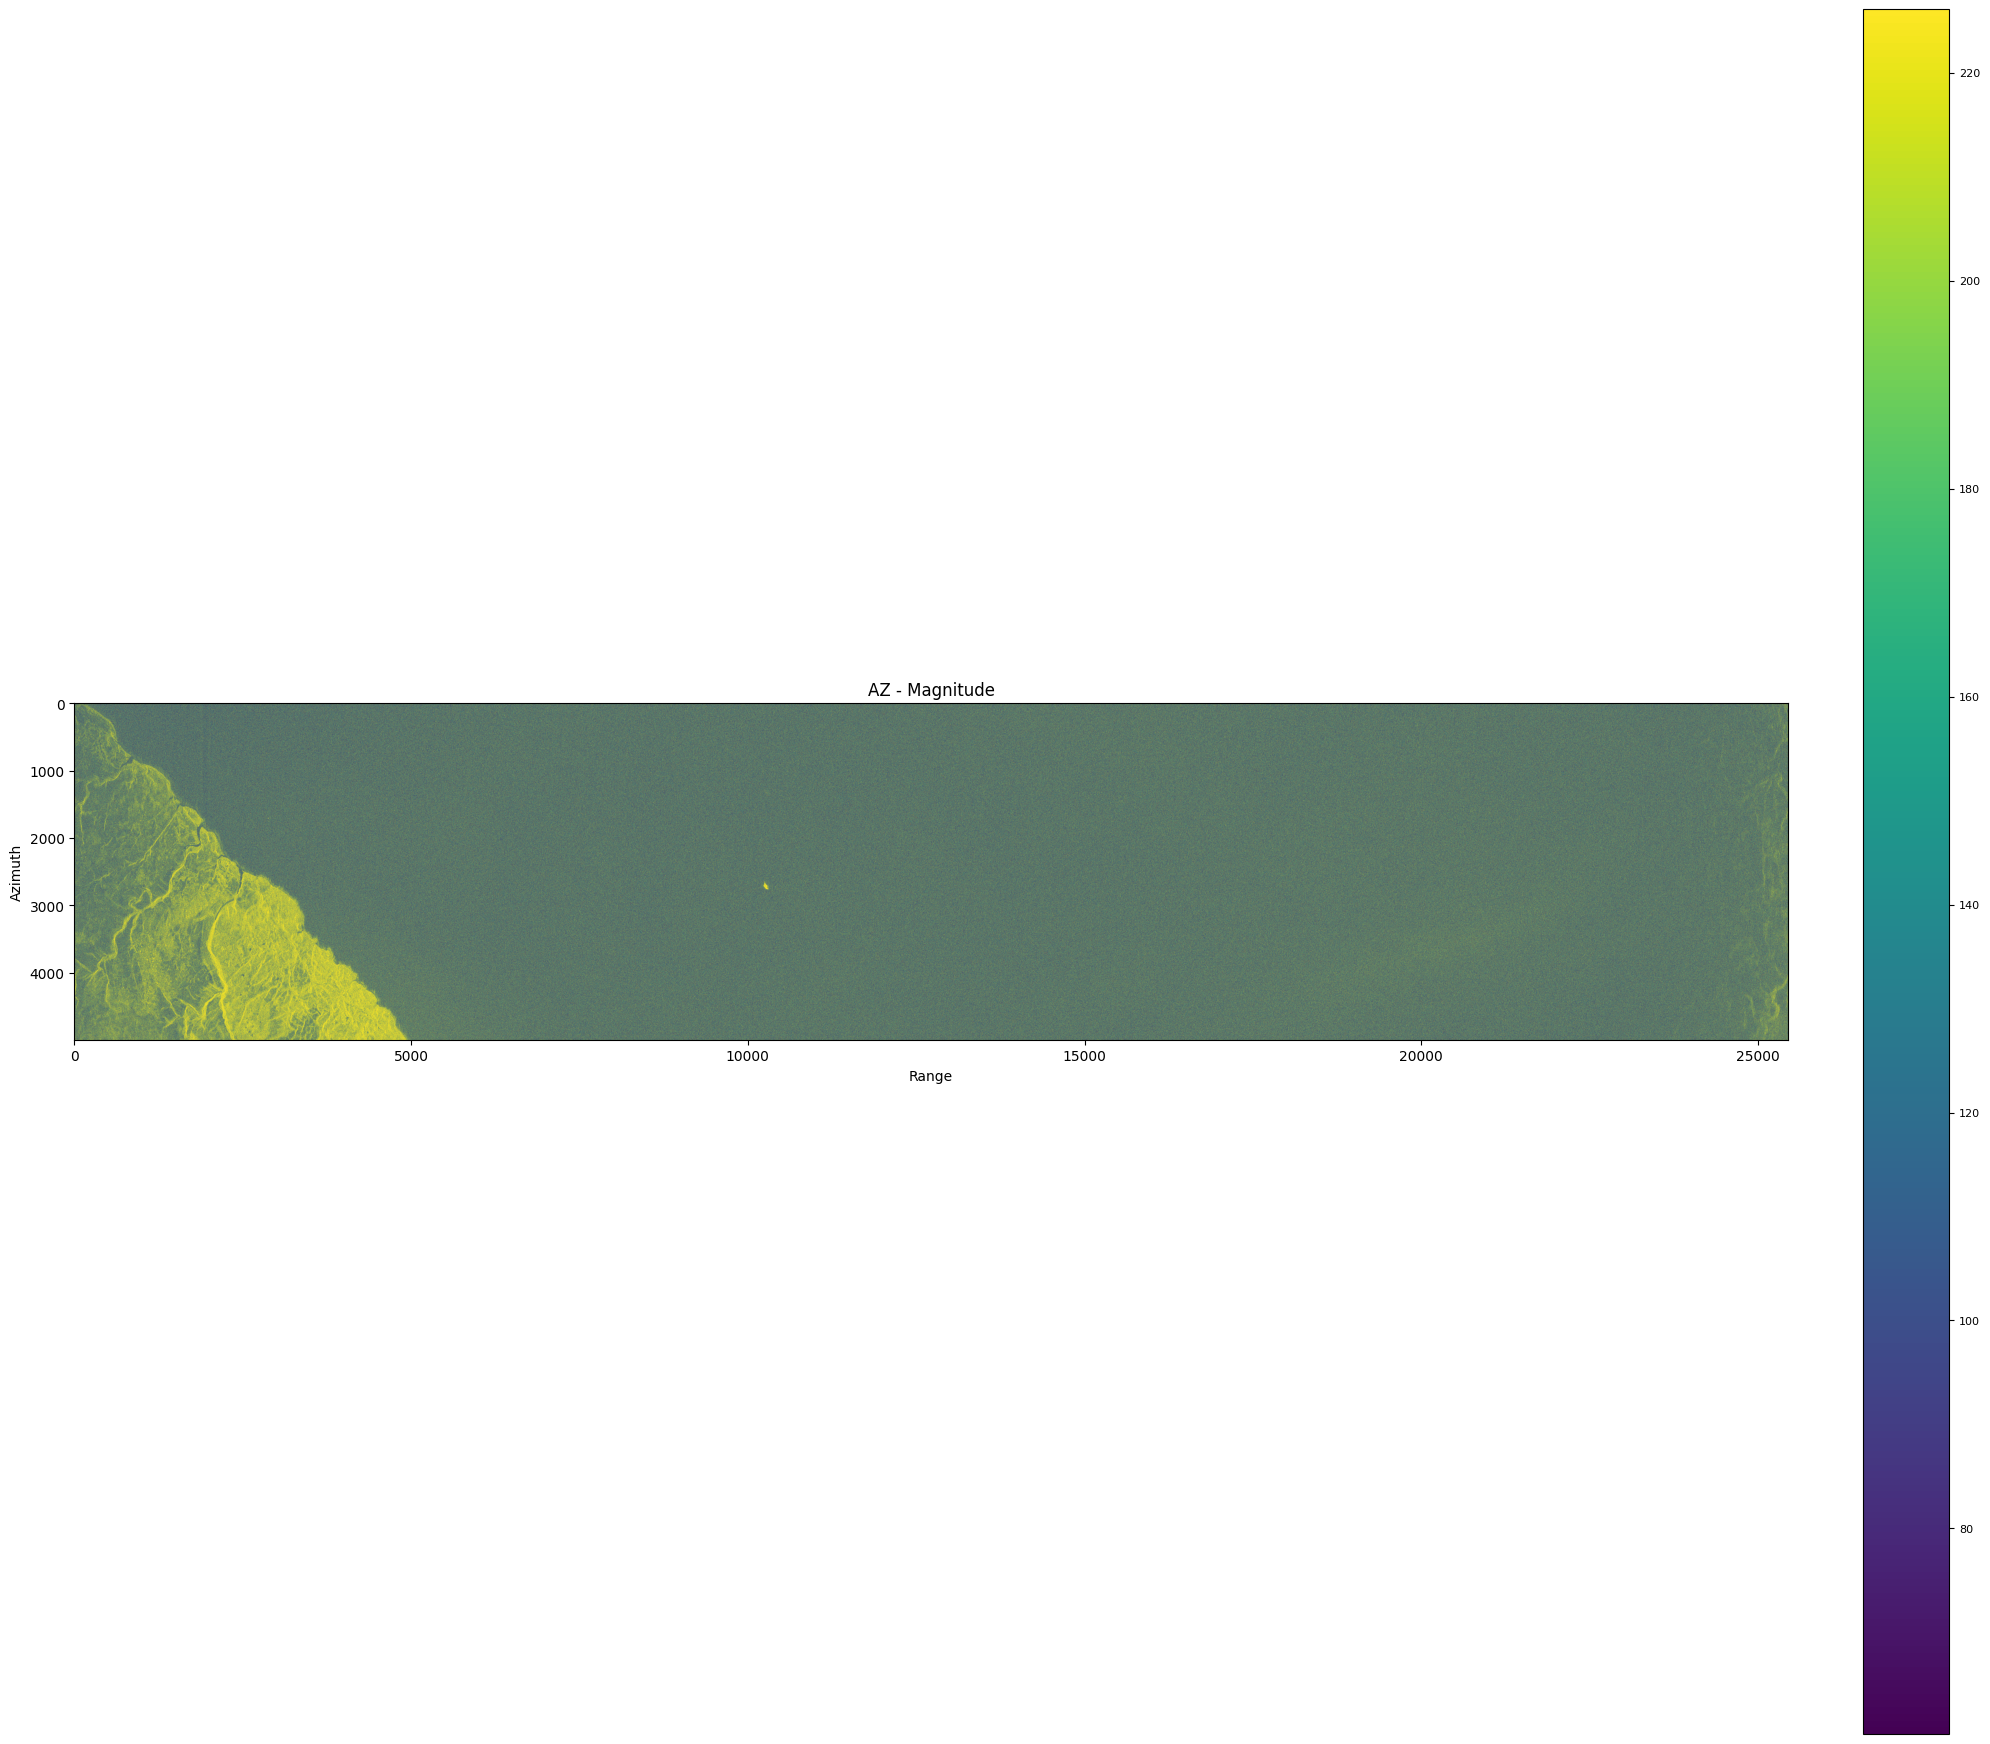

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sarpyx.utils.zarr_utils import ProductHandler
import os

filepath = "/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data/tmp/processor_slice_2.zarr"

pHandler = ProductHandler(filepath)
shapes = pHandler.array_shapes
H, W  = pHandler.array_shapes['raw']
print(f"Shapes of arrays: {H}x{W}")

row_start, row_end = H-5000, H
col_start, col_end = 0, W

pHandler.visualize_arrays(
    array_names=['az'], 
    rows=(row_start, row_end), 
    cols=(col_start, col_end),
    plot_type='magnitude',
    vminmax='auto',
    figsize=(20, 20)
)

### Inspection of small products

In [ ]:
# Check for zarr files with dimensions smaller than 5000x5000
small_files = []

for zarr_file in zarr_files:
    filepath = os.path.join(data_dir, zarr_file)
    try:
        handler = ProductHandler(filepath)
        file_shapes = handler.array_shapes
        file_h, file_w = file_shapes['raw']
        
        if file_h < 5000 or file_w < 5000:
            small_files.append({
                'filename': zarr_file,
                'dimensions': f'{file_h}x{file_w}',
                'height': file_h,
                'width': file_w
            })
            print(f'Small file found: {zarr_file} - Dimensions: {file_h}x{file_w}')
    except Exception as e:
        print(f'Error processing {zarr_file}: {e}')

print(f'\nSummary: Found {len(small_files)} files with dimensions smaller than 5000x5000')
if small_files:
    print('Files with small dimensions:')
    for file_info in small_files:
        print(f"  - {file_info['filename']}: {file_info['dimensions']}")

### Deletetion

In [ ]:
from sarpyx.utils.zarr_utils import ZarrManager
import shutil 


name = 's1a-s1-raw-s-hh-20160609t060632-20160609t060653-011630-011c9b_burst_0.zarr'
decoded_folder = '/Data_large/marine/PythonProjects/SAR/sarpyx/decoded_data'
path = os.path.join(decoded_folder, name)

handler = ZarrManager(file_path=path)

name = 's1a-s1-raw-s-vh-20150323t070439-20150323t070512-005155-0067fc_burst_0.zarr'
focused_folder = '/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data'
path = os.path.join(focused_folder, name)
# delete
if os.path.exists(path):
    shutil.rmtree(path)
    print(f"Deleted focused data folder: {path}")